# 수행한 것

*   con 8,9 데이터 전처리 (series_nm, supper_asset_nm)
*   score 컬럼 생성
  - count2 : subsr과 series_nm이 같을 때 클릭률
  - count_id : id별 총 클릭률
  - score : count2/count_id

*   위 항목에 subsr과 series_nm를 duplicated 해서 나머지 데이터를 합쳐놓음

## 데이터로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotting 환경 설정
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터를 구분하는 문자를 지정하는 옵션
vod8 = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/data/데이터 3차/데이터스쿨_3차_VOD_2308.csv', sep='\t', encoding='cp949')
vod9 = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/data/데이터 3차/데이터스쿨_3차_VOD_2309.csv', sep='\t', encoding='cp949')
# channel8 = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/data/데이터 3차/데이터스쿨3차_채널PGM_2308월.csv', sep='\t', encoding='cp949')
# channel9 = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/data/데이터 3차/데이터스쿨3차_채널PGM_2309월.csv', encoding='cp949')
con8 = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/data/데이터 3차/데이터스쿨_3차_콘텐츠_2308.csv', sep='\t', encoding='cp949')
con9 = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/data/데이터 3차/데이터스쿨_3차_콘텐츠_2309.csv', sep='\t', encoding='cp949')

In [4]:
v8 = vod8.copy()
v9 = vod9.copy()
c8 = con8.copy()
c9 = con9.copy()

## content 전처리

In [66]:
# con 데이터프레임을 header가 같은 열을 기준으로 합치기
con89 = pd.concat([con8, con9], ignore_index=True)
con89.head()

,subsr,series_nm,super_asset_nm,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt
0,65968000,(영어더빙)핑크퐁 동물 동요,핑크퐁 동물 동요 20회,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,0:01,20230813071155
1,65968000,(영어더빙)핑크퐁 동물 동요,핑크퐁 동물 동요 20회,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,0:01,20230813071215
2,66056000,라바 키즈동요(한국어) Part4,라바 키즈동요(한국어) Part4 17회,키즈,기타,징글벨 크리스마스. 안녕하신가 친구들! 메리 크리스마스~ 징글벨 크리스마스 징글벨 ...,"엘로우,레드",0:02,20230808085440
3,66056000,라바 키즈동요(한국어) Part4,라바 키즈동요(한국어) Part4 17회,키즈,기타,징글벨 크리스마스. 안녕하신가 친구들! 메리 크리스마스~ 징글벨 크리스마스 징글벨 ...,"엘로우,레드",0:02,20230808085432
4,63086000,지니강이 플러스 시즌7.,지니강이 플러스 시즌7. 26회,키즈,기타,로봇 세상에서 킥보드를 타요. 로보카 폴리 브룸스 타운에서 킥보드를 타요~ / 새로...,"헤이지니,럭키강이",0:11,20230827145542


In [64]:
from pandas._libs.tslibs.offsets import Hour
import re
def preprocessing_con(df):
  # 특수문자 정리
  ## 예고편 제거
  df = df[~df['super_asset_nm'].str.contains(r'\(예고편\)|\(예고\)', regex=True)]

  # series_nm 괄호와 그 안의 내용 제거
  df['series_nm'] = df['series_nm'].str.replace(r'\([^()]*\)', '', regex=True)
  df['series_nm'] = df['series_nm'].str.replace(r'\[[^\[\]]*\]', '', regex=True)
  df['series_nm'] = df['series_nm'].str.replace(r'\.\.\.', '', regex=True)
  df['series_nm'] = df['series_nm'].str.replace('-', ' ')
  df['series_nm'] = df['series_nm'].str.rstrip('.')

  # super_asset_nm 변경
  df['super_asset_nm'] = df['super_asset_nm'].str.replace(r'\([^()]*\)', '', regex=True)
  df['super_asset_nm'] = df['super_asset_nm'].str.replace(r'\[[^\[\]]*\]', '', regex=True)
  df['super_asset_nm'] = df['super_asset_nm'].str.replace(r'\.\.\.', '', regex=True)
  df['super_asset_nm'] = df['super_asset_nm'].str.replace('-', ' ')
  df['super_asset_nm'] = df['super_asset_nm'].str.rstrip('.')

  # 회, 회. 제거
  df['series_nm'] = df['series_nm'].str.replace(r'\d+회$', '', regex=True)
  df['series_nm'] = df['series_nm'].str.replace(r'\d+회\.', '', regex=True)
  df['series_nm'] = df['series_nm'].str.replace(r'\d+화$', '', regex = True)

  df['super_asset_nm'] = df['super_asset_nm'].str.replace(r'\d+회$', '', regex=True)
  df['super_asset_nm'] = df['super_asset_nm'].str.replace(r'\d+회\.', '', regex=True)
  df['super_asset_nm'] = df['super_asset_nm'].str.replace(r'\d+화$', '', regex = True)

  # 'series_nm'이 null인 경우, 'super_asset_nm'의 값으로 대체
  df['series_nm'].fillna(df['super_asset_nm'], inplace=True)

  # disp_rtm 문자열을 분 단위로 변경
  def convert_runtime(runtime_str):
    # 입력값이 NaN이면 0 반환
    if pd.isna(runtime_str):
        return 0

    hours = int(runtime_str.split(':')[0])
    minutes = int(runtime_str.split(':')[1])
    total_minutes = hours * 60 + minutes
    return total_minutes

  df['disp_rtm'] = df['disp_rtm'].apply(convert_runtime)

  return df

In [65]:
con89 = preprocessing_con(con89)
con89.head(3)

AttributeError: ignored

### c_score 컬럼 만들기

In [54]:
# 이름 변경
con = con89[['subsr', 'series_nm', 'ct_cl']]
con.columns = ['subsr', 'name', 'BigCategory']
con.tail(1)

,subsr,name,BigCategory
30063,64551000,슈퍼 토끼,키즈


In [55]:
conn = con.copy()

In [56]:
# subsr과 asset_nm이 같은 개수 세기
# size로 행의 개수를 셈(series로 반환)
# 오름차순 or 내림차순으로 변경 sort_values (by는 열을 선택하느 것, ascending은 False가 내림차순)
# reset_index  : 현재 인덱스를 새로운 열로 추가하고(name으로 이름 설정), 기존 index를 재설정, index추가 원하지 않으면 drop=True
count = con.groupby(['subsr', 'name']).size().reset_index(name='count').sort_values(by='count', ascending=False)
count

,subsr,name,count
3501,64154000,최강 배달꾼,232
453,60326000,천고결진,119
4326,64720000,낭만닥터 김사부3,110
4307,64680000,연인 파트1,105
3696,64385000,TV동물농장,104
...,...,...,...
5969,66056000,80일간의 세계일주,1
5968,66056000,7호실,1
5967,66056000,7일의 왕비,1
2726,62816000,보호자,1


In [57]:
# 이상치 확인 후 삭제
count_id = con.groupby(['subsr']).size().reset_index(name='count').sort_values(by='count', ascending=False)
count_id

,subsr,count
650,66056000,8899
348,64154000,853
378,64385000,837
98,60939000,759
51,60326000,759
...,...,...
736,66448000,1
259,62714000,1
151,61478000,1
605,65808000,1


In [58]:
# subsr = 66056000 삭제
con.drop(con[con['subsr'] == 66056000].index, inplace=True)
count_id = con.groupby(['subsr']).size().reset_index(name='count').sort_values(by='count', ascending=False)
count_id

<ipython-input-58-8c4427f05d49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con.drop(con[con['subsr'] == 66056000].index, inplace=True)


,subsr,count
348,64154000,853
378,64385000,837
98,60939000,759
51,60326000,759
68,60593000,632
...,...,...
594,65753000,1
592,65743000,1
154,61509000,1
587,65706000,1


In [59]:
# 'ID' 열을 기준으로 두 데이터 프레임을 합치기
# 앞에 두개는 데이터프레임, on은 기준점
# inner은 공통된 아이디만 내부 조인
# left는 왼쪽은 모두 포함하면서 오른쪽은 일치하는 행이 있는 경우에만 합치고, 값이 없으면 NaN(right는 반대)
# outer 양쪽 데이터프레임 모두의 행을 포함하고 일치하지 않는 행은 NaN값으로 채워줌
n_con = pd.merge(count, count_id, on='subsr', how='inner')

# 새로운 컬럼 추가
new_column_name  = 'c_score'
n_con["c_score"] = pd.Series(dtype='object')
n_con

,subsr,name,count_x,count_y,c_score
0,64154000,최강 배달꾼,232,853,NaN
1,64154000,사랑의 불시착,94,853,NaN
2,64154000,응답하라 1988,75,853,NaN
3,64154000,경이로운 소문,68,853,NaN
4,64154000,경이로운 소문2: 카운터 펀치,52,853,NaN
...,...,...,...,...,...
7364,62752000,범죄도시3,1,1,NaN
7365,62837000,기생충,1,1,NaN
7366,62816000,비공식작전,1,2,NaN
7367,62816000,보호자,1,2,NaN


In [60]:
n_con.columns = ['subsr', 'name', 'count_s', 'count_id', 'score']
n_con

,subsr,name,count_s,count_id,score
0,64154000,최강 배달꾼,232,853,NaN
1,64154000,사랑의 불시착,94,853,NaN
2,64154000,응답하라 1988,75,853,NaN
3,64154000,경이로운 소문,68,853,NaN
4,64154000,경이로운 소문2: 카운터 펀치,52,853,NaN
...,...,...,...,...,...
7364,62752000,범죄도시3,1,1,NaN
7365,62837000,기생충,1,1,NaN
7366,62816000,비공식작전,1,2,NaN
7367,62816000,보호자,1,2,NaN


In [61]:
n_con["score"] = n_con["count_s"]/n_con["count_id"]
n_con

,subsr,name,count_s,count_id,score
0,64154000,최강 배달꾼,232,853,0.271981
1,64154000,사랑의 불시착,94,853,0.110199
2,64154000,응답하라 1988,75,853,0.087925
3,64154000,경이로운 소문,68,853,0.079719
4,64154000,경이로운 소문2: 카운터 펀치,52,853,0.060961
...,...,...,...,...,...
7364,62752000,범죄도시3,1,1,1.000000
7365,62837000,기생충,1,1,1.000000
7366,62816000,비공식작전,1,2,0.500000
7367,62816000,보호자,1,2,0.500000


#### c_score 정규화 및 단위 변경

In [120]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
n_con['normalized_score'] = scaler.fit_transform(n_con[['score']])

n_con

,subsr,name,count_s,count_id,score,normalized_values,normalized_column,normalized_score
0,64154000,최강 배달꾼,232,853,0.271981,0.271127,0.650487,0.650487
1,64154000,사랑의 불시착,94,853,0.110199,0.109155,-0.052520,-0.052520
2,64154000,응답하라 1988,75,853,0.087925,0.086854,-0.149310,-0.149310
3,64154000,경이로운 소문,68,853,0.079719,0.078638,-0.184970,-0.184970
4,64154000,경이로운 소문2: 카운터 펀치,52,853,0.060961,0.059859,-0.266478,-0.266478
...,...,...,...,...,...,...,...,...
7363,62714000,상속자들,1,1,1.000000,1.000000,3.814019,3.814019
7364,62837000,기생충,1,1,1.000000,1.000000,3.814019,3.814019
7365,62781000,악마가 너의 이름을 부를때,1,1,1.000000,1.000000,3.814019,3.814019
7366,62816000,보호자,1,2,0.500000,0.499413,1.641320,1.641320


In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
temp = scaler.fit_transform(n_con[['score']])
temp = pd.DataFrame(temp)
temp

,0
0,0.650487
1,-0.052520
2,-0.149310
3,-0.184970
4,-0.266478
...,...
7363,3.814019
7364,3.814019
7365,3.814019
7366,1.641320


<Axes: ylabel='Frequency'>

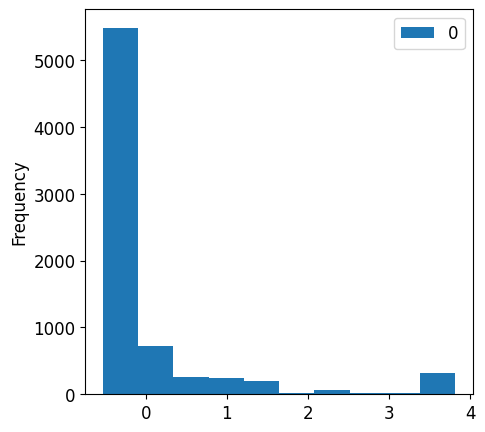

In [115]:
temp.plot(kind = 'hist')

## vod 전처리

In [98]:
# con 데이터프레임을 header가 같은 열을 기준으로 합치기
vod89 = pd.concat([vod8, vod9], ignore_index=True)
vod89.tail(1)

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
10656,60169000,놀자!,키즈,학습,407,[인기작가 박정섭의 그림책] 놀고 싶은 어린이들 모두 모두 모여라! 온몸으로 뛰어놀...,-,0:07,20230914210135


In [99]:
# asset_nm 괄호와 괄호 안의 데이터 제거
def preprocessing_vod(df):
  # 특수문자 정리
  ## 예고편 제거
  df = df[~df['asset_nm'].str.contains(r'\(예고편\)|\(예고\)', regex=True)]

  # series_nm 괄호와 그 안의 내용 제거
  df['asset_nm'] = df['asset_nm'].str.replace(r'\([^()]*\)', '', regex=True)
  df['asset_nm'] = df['asset_nm'].str.replace(r'\[[^\[\]]*\]', '', regex=True)
  df['asset_nm'] = df['asset_nm'].str.replace(r'\.\.\.', '', regex=True)
  df['asset_nm'] = df['asset_nm'].str.replace('-', ' ')
  df['asset_nm'] = df['asset_nm'].str.rstrip('.')

  # 회, 회. 제거
  df['asset_nm'] = df['asset_nm'].str.replace(r'\d+회$', '', regex=True)
  df['asset_nm'] = df['asset_nm'].str.replace(r'\d+회\.', '', regex=True)
  df['asset_nm'] = df['asset_nm'].str.replace(r'\d+화$', '', regex = True)

  # disp_rtm 문자열을 분 단위로 변경
  def convert_runtime(runtime_str):
    # 입력값이 NaN이면 0 반환
    if pd.isna(runtime_str):
        return 0

    hours = int(runtime_str.split(':')[0])
    minutes = int(runtime_str.split(':')[1])
    total_minutes = hours * 60 + minutes
    return total_minutes

  df['disp_rtm'] = df['disp_rtm'].apply(convert_runtime)

  return df

In [101]:
vod89 = preprocessing_vod(vod89)
vod89.head(3)

<ipython-input-99-182211ba8834>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['asset_nm'] = df['asset_nm'].str.replace(r'\([^)]*\)', '', regex=True)
<ipython-input-99-182211ba8834>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['use_tms'] = round(df['use_tms'] / 60, 1)
<ipython-input-99-182211ba8834>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
0,65941000,그것이알고싶다 1361회,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230812163507
1,66873000,그것이알고싶다 1361회,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230816205227
2,66873000,그것이알고싶다 1361회,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230829194727


In [102]:
df = df.dropna()

In [103]:
df1 = df[['asset_nm', 'ct_cl', 'genre_of_ct_cl', 'SMRY', 'ACTR_DISP', 'disp_rtm']].drop_duplicates().reset_index(drop = True)
df1.head()

,asset_nm,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm
0,그것이알고싶다 1361회,TV 시사/교양,기타,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80
1,꼬리에꼬리를무는그날이야기 37회,TV 시사/교양,기타,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73
2,꼬리에꼬리를무는그날이야기 61회,TV 시사/교양,기타,협박범의 편지 - 4천만 대국민 인질극.,"장도연,장현성,장성규",73
3,인간극장 3338회,TV 시사/교양,기타,[스리랑카 명선 스님 인연 4부] 스리랑카 절을 찾은 명선 스님. 스리랑카에서는 스...,명선 스님,32
4,꼬리에꼬리를무는그날이야기 89회,TV 시사/교양,기타,"어느 날 내가 사라졌다 - 그 여자의 살인 시나리오. 2010년 6월, 부산에 있는...","장도연,장현성,장성규",78


In [ ]:
df2 = pd.DataFrame(df.groupby(['subsr','asset_nm'])['use_tms'].sum()).reset_index()
df2.head()

In [105]:
# 유저별 asset_nm 본 시간 합친 데이터프레임
df3 = df2.merge(df1, on = 'asset_nm', how = 'left')
df3 = df3[(df3['disp_rtm'] != 0) & (df3['use_tms'] != 0)]
df3

,subsr,asset_nm,use_tms,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm
0,59879000,소방서 옆 경찰서 05회,2.4,TV드라마,기타,"범죄 모의 일당에 지원하며, 언더커버 작전을 시작하는 호개. 그런데 이 놈들, 단순...","김래원,손호준,공승연",69
1,59879000,소방서 옆 경찰서 06회,22.1,TV드라마,기타,컨테이너 함바집 화재 현장에서 발견된 의문의 불에 탄 시체! 순조롭게 진행된 경찰 ...,"김래원,손호준,공승연",59
2,59879000,신성한 이혼 01회,12.6,TV드라마,기타,독특한 이력을 자랑하는 이혼 전문 변호사 신성한에게 외도 스캔들로 곤혹을 겪는 유명...,"조승우,한혜진,김성균,정문성",64
3,59879000,신성한 이혼 02회,16.8,TV드라마,기타,의외의 인물로부터 사건 해결의 열쇠를 찾은 성한은 재판장에서 승부수를 던진다.,"조승우,한혜진,김성균,정문성",62
4,59879000,신성한 이혼 03회,4.3,TV드라마,기타,"말 못할 고부갈등으로 성한을 찾아온 애란. 한편, 달갑지 않은 손님이 성한 앞에 등...","조승우,한혜진,김성균,정문성",63
...,...,...,...,...,...,...,...,...
6045,67148000,타요의 씽씽극장 동요2 11회,0.5,키즈,기타,겨울 친구. 하얗게 반짝이는 눈이 펑펑 내렸어요. 썰매도 타고 눈싸움도 해볼까요? ...,-,2
6046,67154000,스트릿 우먼 파이터 2 04회,1.2,TV 연예/오락,기타,최초로 관객과 함께하는 스트릿 우먼 파이터 2 세 번째 미션! K-POP 데스 매치...,"강다니엘,모니카,셔누,원밀리언,베베,딥앤댑,잼 리퍼블릭,레이디바운스,마네퀸,츠바킬,울플러",131
6047,67161000,스파이 코드명 포춘,0.2,영화,액션/어드벤쳐,"전 세계 검은 무기 거래 왕, 슈퍼 빌런 그렉. 그가 정체를 파악조차 불가능한 핸들...","제이슨 스타뎀,휴 그랜트,조쉬 하트넷",114
6048,67164000,밀수,250.6,영화,액션/어드벤쳐,평화롭던 바닷가 마을 군천에 화학 공장이 들어서면서 하루아침에 일자리를 잃은 해녀들...,"김혜수,염정아,조인성,박정민,김종수,고민시",129


## 결합

In [50]:
vodcon = pd.merge(vod, n_con, how='inner', on=['subsr', 'name'] )
vodcon

,subsr,name,Summary,actors,director,BigCategory,SmallCategory,Category,runningtime,SMRY,count_s,count_id,score
0,65941000,그것이알고싶다,NaN,김상중,NaN,TV 시사/교양,기타,NaN,1:20,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,4,15,0.266667
1,65941000,그것이알고싶다,NaN,김상중,NaN,TV 시사/교양,기타,NaN,1:17,"보라카이, 죽음의 여행 - 호텔 밀실 사망 미스터리. 2020년 1월 17일 밤, ...",4,15,0.266667
2,65941000,그것이알고싶다,NaN,김상중,NaN,TV 시사/교양,기타,NaN,1:07,"남편의 두 얼굴 - 태안 저수지 아내 살인사건. 한국, 캄보디아, 필리핀 3개국을 ...",4,15,0.266667
3,66873000,그것이알고싶다,NaN,김상중,NaN,TV 시사/교양,기타,NaN,1:20,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,18,357,0.050420
4,66873000,그것이알고싶다,NaN,김상중,NaN,TV 시사/교양,기타,NaN,1:20,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,18,357,0.050420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9208,63086000,프렌즈 2022,NaN,-,NaN,키즈,애니메이션,NaN,0:10,서로 다른 꿈을 갖고 있는 다섯 명의 프렌즈! 그 꿈을 이루기 위해 새로운 모험을 ...,4,164,0.024390
9209,63086000,프렌즈 2022,NaN,-,NaN,키즈,애니메이션,NaN,0:10,불량 구조요원 때문에 서로에게 삐친 엠마와 스테파니. 놀이 기구에 같이 갇히는 바람...,4,164,0.024390
9210,63086000,프렌즈 2022,NaN,-,NaN,키즈,애니메이션,NaN,0:11,"엠마와 스테파니에게 바람맞은 올리비아는 워터파크에서 함께 놀 새 친구, 쳇을 사귀게...",4,164,0.024390
9211,66841000,닌자고 드래곤 헌터,NaN,"로이드,쟌,콜",NaN,키즈,애니메이션,NaN,0:21,"그린 닌자의 각성. 닌자고로 돌아온 마스터 우와 제이, 카이, 콜, 쟌은 로이드를 ...",2,9,0.222222
